## Ôn Tập SVM
## Lung Cancer Classification
![https://images.medicinenet.com/images/image_collection/anatomy/lung-cancer.jpg](https://images.medicinenet.com/images/image_collection/anatomy/lung-cancer.jpg)

## Import thư viện cần thiết

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Đọc dữ liệu từ file lung_cancer_examples.csv

In [179]:
cancer_data = pd.read_csv('./lung_cancer_examples.csv')
cancer_data.info()
cancer_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


## Biểu đồ cột biểu diễn phân bố dữ liệu của cột kết quả

Text(0.5, 0, 'diagnose')

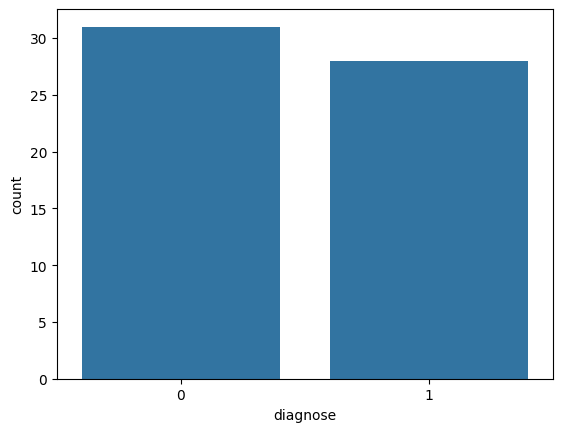

In [180]:
# Distribution of diagnosis
diagnose_count = cancer_data['Result'].value_counts()

sns.barplot(diagnose_count)
plt.xlabel("diagnose")

## Loại bỏ 2 cột Name, SurName khỏi dataset

In [181]:
cancer_data.drop(labels=['Name', 'Surname'], axis= 1, inplace=True)
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


## *VISUALIZING THE DATA*

### Vẽ biểu đồ để phân tích phân bố dữ liệu như hình dưới

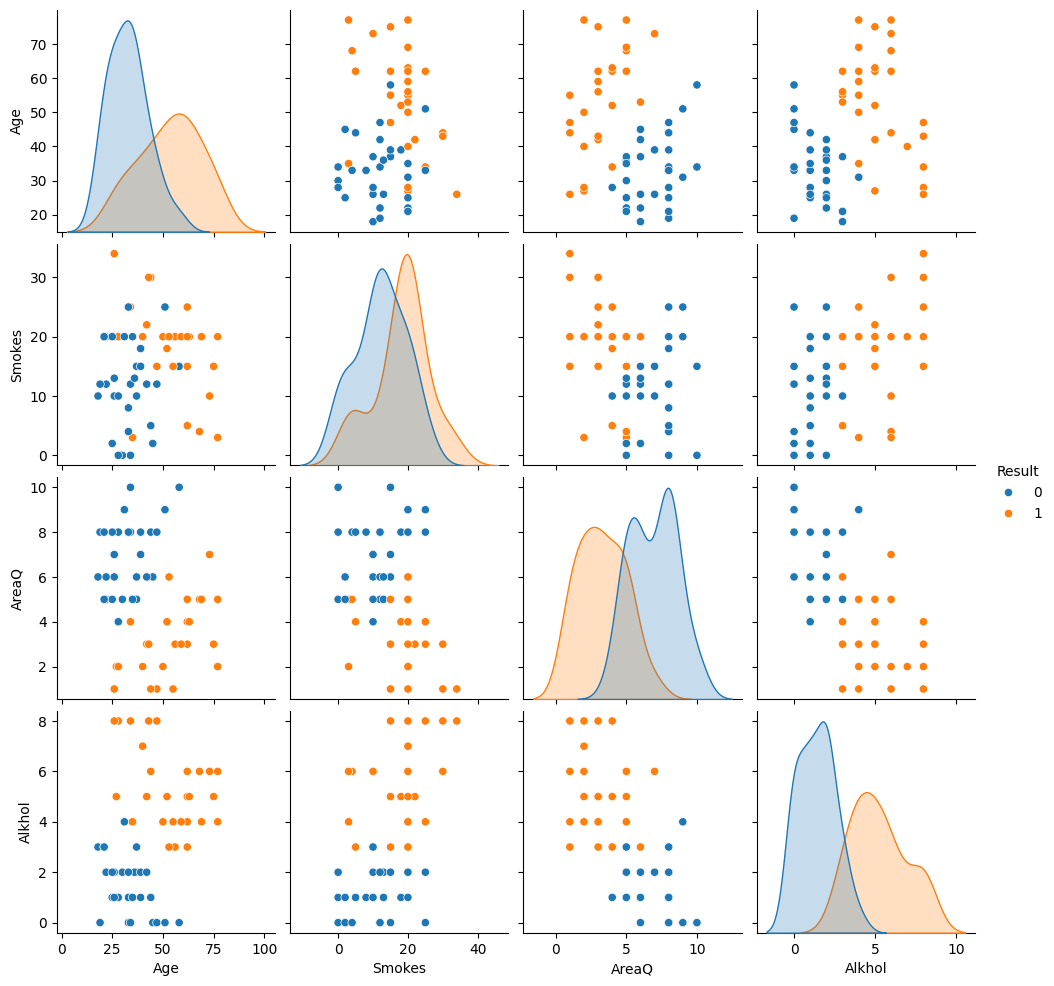

In [182]:
sns.pairplot(data=cancer_data, hue='Result')

### Data for training and testing

## Thực hiện chia dataset thành 2 tập train và test với train = 70% và test = 30%, random_state = 42

In [183]:
# nên for i để tìm random_state trước khi fit để tìm ra random_state tốt nhất

scaler = StandardScaler()

x = cancer_data.iloc[:, :4]
y = cancer_data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.3,
    random_state = 9
)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [184]:
print('X train shape: ', x_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', x_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (41, 4)
Y train shape:  (41,)
X test shape:  (18, 4)
Y test shape:  (18,)


## SVM (Support Vector Machine) classification

In [185]:
svm_model = SVC(C=10, probability=True, random_state=9)
svm_model.fit(x_train, y_train)

SVC(C=10, probability=True, random_state=9)

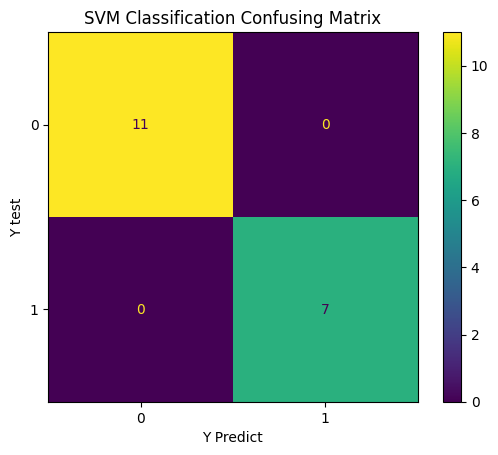

In [186]:
y_pred = svm_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm_model.classes_)
disp.plot()
plt.ylabel('Y test')
plt.xlabel('Y Predict')
plt.title('SVM Classification Confusing Matrix')
plt.show()

In [187]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0